In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


### DataSet Understanding

In [2]:
# Loading DataSet
gb=pd.read_csv('dataset2tr.csv')
gb.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,cng,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
# Dimension of dataset
gb.shape

# number of rows = 58592
# number of columns = 44

(58592, 44)

In [4]:
# Verifying datatypes of the columns
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58556 non-null  float64
 4   area_cluster                      58091 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
gb.nunique()

# There are categorical columns identified as numerical. So, we can consider the column having numerical datatype but less 
# than 10 unique values as categorical columns

policy_id                           58592
policy_tenure                       58591
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               6
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [6]:
### Data type correction

#gb['make']=gb['make'].astype(object)
#gb['population_density']=gb['population_density'].astype(object)
#gb['airbags']=gb['airbags'].astype(object)
#gb['displacement']=gb['displacement'].astype(object)
#gb['cylinder']=gb['cylinder'].astype(object)
#gb['gear_box']=gb['gear_box'].astype(object)
#gb['ncap_rating']=gb['ncap_rating'].astype(object)
#gb['turning_radius']=gb['turning_radius'].astype(object)
#gb['length']=gb['length'].astype(object)
#gb['width']=gb['width'].astype(object)
#gb['height']=gb['height'].astype(object)
#gb['gross_weight']=gb['gross_weight'].astype(object)
#gb['is_claim'] = gb['is_claim'].astype(object)

In [7]:
# Statistical summary of numerical columns
gb.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58556.000000,58592.000000,58592.000000,53680.000000,58592.000000,58592.000000,57347.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469431,18826.858667,1.763722,3.241114,1162.355851,3.626963,5.250772,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122923,17660.174792,1.136988,1.880630,266.304786,0.483616,0.433461,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,6.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [8]:
# Statistical summary of categorical columns
gb.describe(include='object')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58091,58592,58592,58592,58592,58592,58070,57392,58592,...,58592,58592,58592,58592,58592,58483,58592,58592,58592,58484
unique,58592,22,6,11,6,9,9,11,2,2,...,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13153,18314,14948,20182,17796,17796,14948,40191,35526,...,41634,38077,32177,42435,42435,57274,34291,36309,42435,58121


### Data Pre-Processing

In [9]:
# Checking duplicate values
gb[gb.duplicated()]

# no duplicate rows

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim


#### 1. IDENTIFYING AND HANDLING ANOMALIES PRESENT IN DATA

In [10]:
# 1.Anomaly in Fuel_Type

gb['fuel_type'].value_counts() 

# fuel_type 'Petrol','Diesel', 'CNG'and 'petrol','diesel','cng' are same which is identified as two different types due to
# case sensitivity

Petrol    20182
CNG       19502
Diesel    17440
cng         828
petrol      350
diesel      290
Name: fuel_type, dtype: int64

In [11]:
# correcting the defect
gb['fuel_type']=gb['fuel_type'].transform(lambda x:x.upper())
gb['fuel_type'].value_counts()

PETROL    20532
CNG       20330
DIESEL    17730
Name: fuel_type, dtype: int64

In [12]:
# 2.Anomaly in Turning_Radius

gb['turning_radius'].value_counts()   

# some of the entries in 'turning_radius' are incorrect as they have ',' instead of '.'

4.6     14619
4.8     13739
5.2     12947
4.7      3843
5        3694
4.85     2689
4.9      1936
4,8      1117
4.5      1117
5,2      1071
5.1       348
4,7       330
4,6       329
5,0       277
4,85      251
4,9       178
4,5        92
5,1        15
Name: turning_radius, dtype: int64

In [13]:
# correcting the defect
gb['turning_radius'] = gb['turning_radius'].str.replace(',','.')
gb['turning_radius'].value_counts()

4.6     14948
4.8     14856
5.2     14018
4.7      4173
5        3694
4.85     2940
4.9      2114
4.5      1209
5.1       363
5.0       277
Name: turning_radius, dtype: int64

#### 2. CHECKING THE PRESENCE OF MISSING/NULL VALUES

<AxesSubplot:>

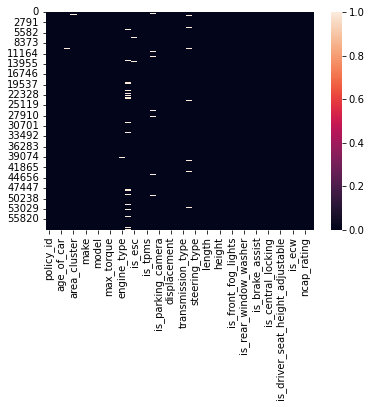

In [14]:
sns.heatmap(gb.isnull())

In [15]:
# Count of missing/null values

gb.isnull().sum()

policy_id                              0
policy_tenure                          0
age_of_car                             0
age_of_policyholder                   36
area_cluster                         501
population_density                     0
make                                   0
segment                                0
model                                  0
fuel_type                              0
max_torque                             0
max_power                              0
engine_type                          522
airbags                             4912
is_esc                              1200
is_adjustable_steering                 0
is_tpms                                0
is_parking_sensors                  2114
is_parking_camera                      0
rear_brakes_type                       0
displacement                           0
cylinder                               0
transmission_type                      0
gear_box                            1245
steering_type   

In [16]:
# Percentage of missing values

gb.isnull().sum()/len(gb)

policy_id                           0.000000
policy_tenure                       0.000000
age_of_car                          0.000000
age_of_policyholder                 0.000614
area_cluster                        0.008551
population_density                  0.000000
make                                0.000000
segment                             0.000000
model                               0.000000
fuel_type                           0.000000
max_torque                          0.000000
max_power                           0.000000
engine_type                         0.008909
airbags                             0.083834
is_esc                              0.020481
is_adjustable_steering              0.000000
is_tpms                             0.000000
is_parking_sensors                  0.036080
is_parking_camera                   0.000000
rear_brakes_type                    0.000000
displacement                        0.000000
cylinder                            0.000000
transmissi

In [17]:
# Treating null values 

# Imputing null values of columns with median, mode. Also applying logical imputation wherever possible

gb.age_of_policyholder=gb.age_of_policyholder.fillna(gb.age_of_policyholder.median())
gb['area_cluster']=gb['area_cluster'].fillna(gb['area_cluster'].mode()[0])
gb['make']=gb['make'].fillna(gb['make'].mode()[0])
gb['engine_type']=gb.groupby('make')['engine_type'].transform(lambda x:x.fillna(x.mode()[0]))
gb['airbags']=gb.groupby('model')['airbags'].transform(lambda x:x.fillna(x.mode()[0]))
gb['is_esc']=gb.groupby('model')['is_esc'].transform(lambda x:x.fillna(x.mode()[0]))
gb['is_parking_sensors']=gb['is_parking_sensors'].transform(lambda x:x.fillna(x.mode()[0]))
gb['gear_box']=gb.groupby('model')['gear_box'].transform(lambda x:x.fillna(x.mode()[0]))
gb['is_power_steering']=gb.groupby('model')['is_power_steering'].transform(lambda x:x.fillna(x.mode()[0]))
gb['is_speed_alert']=gb.groupby('model')['is_speed_alert'].transform(lambda x:x.fillna(x.mode()[0]))

In [18]:
gb.isnull().sum()   # Null values are treated

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

#### 3. Feature Engineering

In [19]:
# Feature Engineering: creating new columns
# New columns can provide better information and creating them from existing columns can help us to drop redundant cols.


gb['maximum_power_Kw']=gb['max_power'].transform(lambda x:float(x.replace('rpm','').split('bhp@')[0])*0.746) #1

gb['maximum_torque']=gb['max_torque'].transform(lambda x:float(x.replace('rpm','').split('Nm@')[0])) #2

gb['torque_power_ratio_Nm/Kw']=gb['maximum_torque']/gb['maximum_power_Kw'] #3

gb['peak_power_rpm']=(gb['maximum_power_Kw']/gb['maximum_torque'])*9549    # 4

gb['aspect_ratio']=(gb['length']/gb['height'])        #5

gb['footprint']=(gb['length']*gb['width'])              #6

gb['volume_M3']=round(gb['length']*gb['width']*gb['height']/1000000000,2)  #7

gb['safety_index']=round(gb['ncap_rating']*gb['airbags']*gb['volume_M3'],2)   #8

# 'safety_index' is a comprehensive safety feature of car combining various columns. so now we can drop ncap, airbags

 REDUNDANT COLUMNS:

In [20]:
gb['policy_id'].head(3)
# This is a redundant column as it is a unique identifier

0    ID00001
1    ID00002
2    ID00003
Name: policy_id, dtype: object

In [21]:
gb.groupby('area_cluster')['population_density'].value_counts()  
# area_cluster and population_density provide same information. so, 1 of them can be dropped

area_cluster  population_density
C1            4990                   1468
C10           73430                  3155
C11           6108                   1212
C12           34791                  1589
C13           5410                   3423
C14           7788                   3660
C15           290                     771
C16           16206                   401
C17           65567                   492
C18           35036                   242
C19           27742                   952
C2            27003                  7342
C20           20905                   109
C21           3264                    379
C22           16733                   207
C3            4076                   6101
C4            21622                   665
C5            34738                  6979
C6            13051                   890
C7            6112                   2167
C8            8794                  13654
C9            17804                  2734
Name: population_density, dtype: int64

In [22]:
# OTHER REDUNDANT COLUMNS

# (There are columns about car's characteristics which is unique for car's model, so if car's 'model' 
# is known the other features of car is fixed and there's no variation. Ex- All M1 model car have segament='A', fueltype=
# 'CNG', airbags=2 and so on. Thus if we know the car's model we know about the other features and thereby these features 
# become redundant for predicting target variable.)

# evidence no.1  [Through crosstab]

for i in gb.columns[6:]:
    print(pd.crosstab(gb[i],gb['model'],margins=True))
    print('_________________________________________________________________________________________________________________________')

model     M1   M10  M11    M2    M3     M4    M5     M6    M7    M8    M9  \
make                                                                        
1      14948  1209    0  1080     0      0     0  13776  2940  4173     0   
2          0     0    0     0  2373      0     0      0     0     0     0   
3          0     0    0     0     0  14018     0      0     0     0     0   
4          0     0  363     0     0      0  1598      0     0     0     0   
5          0     0    0     0     0      0     0      0     0     0  2114   
All    14948  1209  363  1080  2373  14018  1598  13776  2940  4173  2114   

model    All  
make          
1      38126  
2       2373  
3      14018  
4       1961  
5       2114  
All    58592  
_________________________________________________________________________________________________________________________
model       M1   M10  M11    M2    M3     M4    M5     M6    M7    M8    M9  \
segment                                                       

model       M1   M10  M11    M2    M3     M4    M5     M6    M7    M8    M9  \
airbags                                                                       
1.0          0  1209    0     0     0      0     0      0     0     0     0   
2.0      14948     0  363  1080  2373      0  1598  13776     0  4173  2114   
6.0          0     0    0     0     0  14018     0      0  2940     0     0   
All      14948  1209  363  1080  2373  14018  1598  13776  2940  4173  2114   

model      All  
airbags         
1.0       1209  
2.0      40425  
6.0      16958  
All      58592  
_________________________________________________________________________________________________________________________
model      M1   M10  M11    M2    M3     M4    M5     M6    M7    M8    M9  \
is_esc                                                                       
No      14948  1209    0     0  2373      0  1598  13776     0  4173  2114   
Yes         0     0  363  1080     0  14018     0      0  2940     

model              M1   M10  M11    M2    M3     M4    M5     M6    M7    M8  \
turning_radius                                                                 
4.5                 0  1209    0     0     0      0     0      0     0     0   
4.6             14948     0    0     0     0      0     0      0     0     0   
4.7                 0     0    0     0     0      0     0      0     0  4173   
4.8                 0     0    0  1080     0      0     0  13776     0     0   
4.85                0     0    0     0     0      0     0      0  2940     0   
4.9                 0     0    0     0     0      0     0      0     0     0   
5                   0     0    0     0  2225      0  1469      0     0     0   
5.0                 0     0    0     0   148      0   129      0     0     0   
5.1                 0     0  363     0     0      0     0      0     0     0   
5.2                 0     0    0     0     0  14018     0      0     0     0   
All             14948  1209  363  1080  

model                     M1   M10  M11    M2    M3     M4    M5     M6    M7  \
is_rear_window_washer                                                           
No                     14948  1209  363  1080  2373      0  1598  13776     0   
Yes                        0     0    0     0     0  14018     0      0  2940   
All                    14948  1209  363  1080  2373  14018  1598  13776  2940   

model                    M8    M9    All  
is_rear_window_washer                     
No                     4173  2114  41634  
Yes                       0     0  16958  
All                    4173  2114  58592  
_________________________________________________________________________________________________________________________
model                       M1   M10  M11    M2    M3     M4    M5     M6  \
is_rear_window_defogger                                                     
No                       14948  1209    0     0  2373      0  1598  13776   
Yes                       

model        M1   M10  M11    M2    M3     M4    M5     M6    M7    M8    M9  \
is_claim                                                                       
0         14030  1136  348  1000  2245  13117  1482  12837  2739  3929  1981   
1           918    73   15    80   128    901   116    939   201   244   133   
All       14948  1209  363  1080  2373  14018  1598  13776  2940  4173  2114   

model       All  
is_claim         
0         54844  
1          3748  
All       58592  
_________________________________________________________________________________________________________________________
model                M1   M10  M11    M2    M3     M4    M5     M6    M7  \
maximum_power_Kw                                                           
30.10856          14948     0    0     0     0      0     0      0     0   
41.71632              0     0    0     0     0      0     0      0     0   
46.01328              0  1209    0     0     0      0     0      0     0   
50.0267

model         M1   M10  M11    M2    M3     M4    M5     M6    M7    M8    M9  \
footprint                                                                       
5219175    14948     0    0     0     0      0     0      0     0     0     0   
5420625        0  1209    0     0     0      0     0      0     0     0     0   
5891249        0     0    0     0  2373      0     0      0     0     0     0   
5921100        0     0    0     0     0      0     0      0     0  4173     0   
6671075        0     0    0     0     0      0     0  13776     0     0     0   
6771525        0     0    0     0     0      0     0      0     0     0  2114   
6931325        0     0    0  1080     0      0     0      0     0     0     0   
6962550        0     0    0     0     0      0     0      0  2940     0     0   
7002450        0     0    0     0     0      0  1598      0     0     0     0   
7231323        0     0  363     0     0      0     0      0     0     0     0   
7697000        0     0    0 

In [23]:
# evidence no.2  [with statistical test]

# H0: the attribute/column 'model' and other independent columns(car's features ) are not related.
     #(independent of each other).(not significant)
    
# H1: column 'model' and the independent columns are dependent. other independent variable are significant wrt to 'model'

l=[]
from scipy.stats import chi2_contingency
for i in gb.iloc[:,6:]:
    c=pd.crosstab(gb[i],gb['model'])
    z,pv,dof,ar=chi2_contingency(c)
    print('column name: ',i,', P_value: ',pv, ', Significance level: 0.05 (5%)')
    l.append(pv)
    if pv<0.05:
        print('Reject Null Hyp., conclude: the column is related/significant wrt column model')
        print('______________________________________________________________________________________________')
    else:
        print('Fail to reject Null Hyp., conclude: the column is not related to column model') 
        print('______________________________________________________________________________________________')
        
# test suggests that all these columns are related to column 'model'

column name:  make , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  segment , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  model , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  fuel_type , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  max_torque , 

column name:  is_ecw , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  is_speed_alert , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  ncap_rating , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  is_claim , P_value:  0.029490222196639326 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
___________________________________________________________________________________________

Text(0.5, 1.0, 'variable relationship with model')

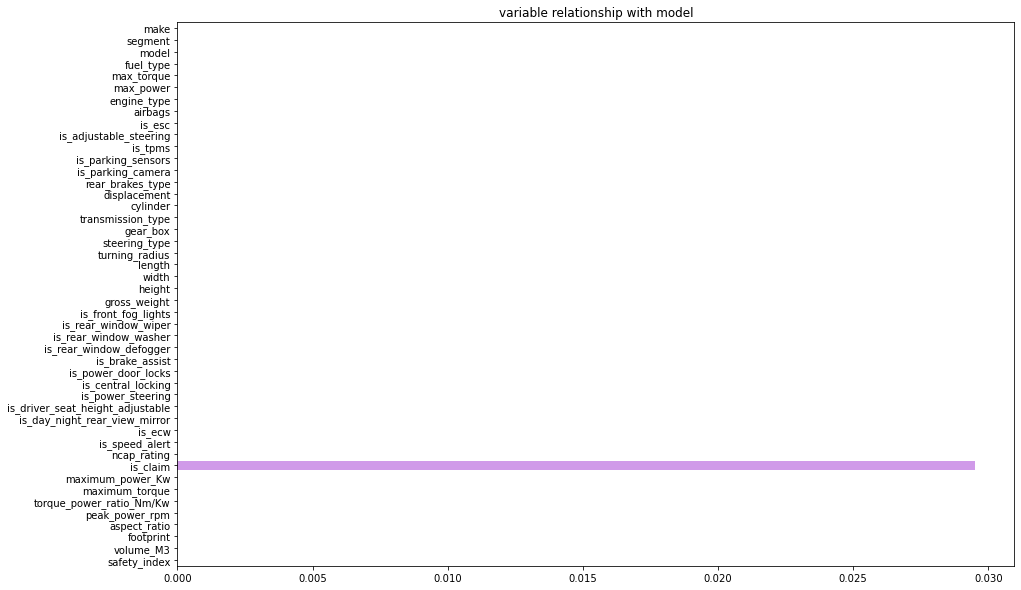

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(l, gb.columns[6:])
plt.title('variable relationship with model')

In [25]:
# evidence 3 [through correlation among these columns, using VIF]

from category_encoders.woe import WOEEncoder 
from statsmodels.stats.outliers_influence import variance_inflation_factor
w=WOEEncoder()
X=w.fit_transform(gb.iloc[:,4:-1],gb['is_claim'])
X_corr = X.corr()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_corr.values, i) for i in range(X_corr.shape[1])]
vif["predictor_variable"] = X.columns

In [26]:
vif.sort_values(by='VIF Factor', ascending=False)

# These columns have high correlation among them.

,VIF Factor,predictor_variable
3,684417.336516,segment
17,222871.277154,cylinder
30,206720.119182,is_brake_assist
22,134981.051274,length
34,132008.095038,is_driver_seat_height_adjustable
12,101729.635944,is_tpms
43,81587.413705,peak_power_rpm
4,81422.093622,model
42,63791.968477,torque_power_ratio_Nm/Kw
35,55581.125930,is_day_night_rear_view_mirror


### Statistical Test to identify Significant Columns

In [27]:
# H0: Independent column is not related to target variable. Independent column is not significant
# H1: Independent column is related to target variable. Independent column is significant

l=[]
from scipy.stats import chi2_contingency
for i in gb.iloc[:,4:]:
    c=pd.crosstab(gb[i],gb['is_claim'])
    z,pv,dof,ar=chi2_contingency(c)
    print('column name: ',i,', P_value: ',pv, ', Significance level: 0.05 (5%)')
    l.append(pv)
    if pv<0.05:
        print('Reject Null Hyp., Conclude: The column is Significant')
    else:
        print('Fail to reject Null Hyp., conclude: The column is not significant')
    print('_______________________________________________________')

column name:  area_cluster , P_value:  1.412557511595789e-11 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  population_density , P_value:  1.4125575115958101e-11 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  make , P_value:  0.3516519554568966 , Significance level: 0.05 (5%)
Fail to reject Null Hyp., conclude: The column is not significant
_______________________________________________________
column name:  segment , P_value:  0.02738747673628079 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  model , P_value:  0.02949022219663932 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_________________________________________________

column name:  peak_power_rpm , P_value:  0.012915422090714527 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  aspect_ratio , P_value:  0.029490222196639264 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  footprint , P_value:  0.02949022219663932 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  volume_M3 , P_value:  0.02949022219663932 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  safety_index , P_value:  0.021980961964016183 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
____________________________________________________

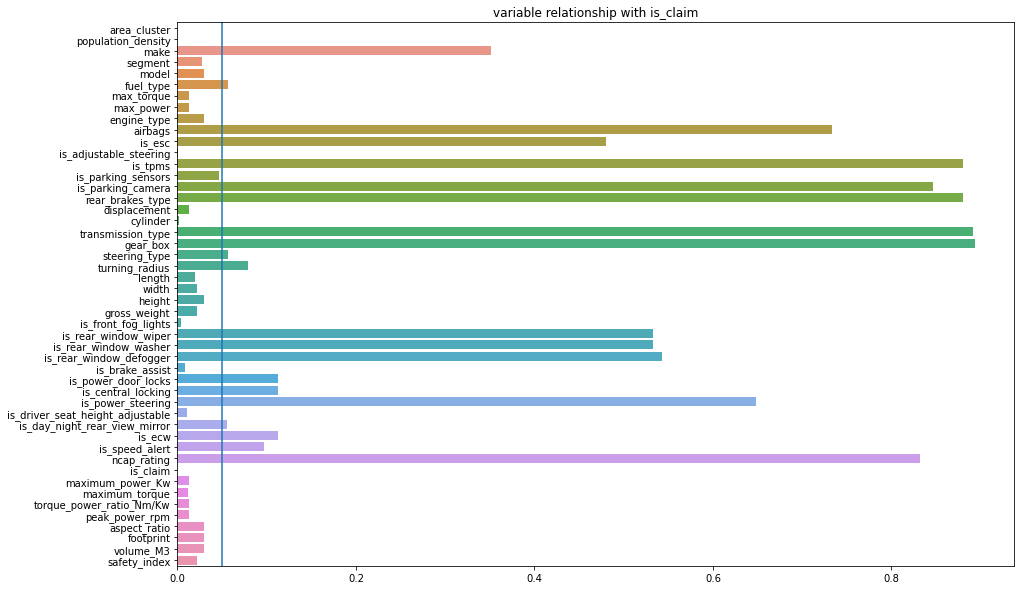

In [28]:
# visual representation of significant column

plt.figure(figsize=(15,10))
sns.barplot(l, gb.columns[4:])
plt.title('variable relationship with is_claim')
plt.axvline(x=0.05)

In [29]:
# Hence, the set of redundant columns

redundant_list=['policy_id','make', 'segment',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating','area_cluster']
print(len(redundant_list))
print(redundant_list)

38
['policy_id', 'make', 'segment', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'area_cluster']


###### Modified Dataframe after dropping the redundant columns and including news columns:

In [30]:
df=gb.drop(redundant_list,axis=1)
df

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,is_claim,maximum_power_Kw,maximum_torque,torque_power_ratio_Nm/Kw,peak_power_rpm,aspect_ratio,footprint,volume_M3,safety_index
0,0.515874,0.05,0.644231,4990,M1,0,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.00
1,0.672619,0.02,0.375000,27003,M1,0,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.00
2,0.841110,0.02,0.384615,4076,M1,0,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.00
3,0.900277,0.11,0.432692,21622,M2,0,66.02100,113.0,1.711577,5579.066628,2.636964,6931325,10.50,42.00
4,0.596403,0.11,0.634615,34738,M3,0,50.02676,91.0,1.819026,5249.511332,2.504027,5891249,8.78,35.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,M3,0,50.02676,91.0,1.819026,5249.511332,2.504027,5891249,8.78,35.12
58588,1.199642,0.02,0.519231,7788,M1,0,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.00
58589,1.162273,0.05,0.451923,34738,M1,0,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.00
58590,1.236307,0.14,0.557692,8794,M6,0,66.02100,113.0,1.711577,5579.066628,2.513072,6671075,10.21,40.84


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   policy_tenure             58592 non-null  float64
 1   age_of_car                58592 non-null  float64
 2   age_of_policyholder       58592 non-null  float64
 3   population_density        58592 non-null  int64  
 4   model                     58592 non-null  object 
 5   is_claim                  58592 non-null  int64  
 6   maximum_power_Kw          58592 non-null  float64
 7   maximum_torque            58592 non-null  float64
 8   torque_power_ratio_Nm/Kw  58592 non-null  float64
 9   peak_power_rpm            58592 non-null  float64
 10  aspect_ratio              58592 non-null  float64
 11  footprint                 58592 non-null  int64  
 12  volume_M3                 58592 non-null  float64
 13  safety_index              58592 non-null  float64
dtypes: flo

### Visual Analysis of Data

#### 1. UNIVARIATE ANALYSIS

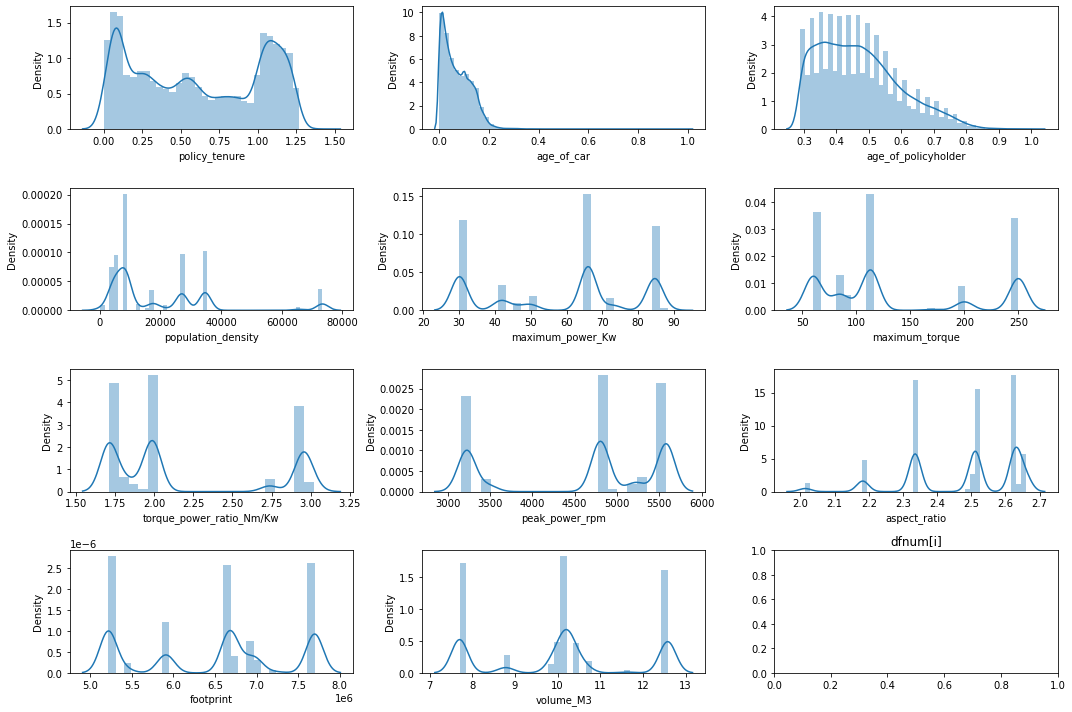

In [32]:
# NUMERICAL COLUMNS

df['is_claim'] = df['is_claim'].astype('object')
df['safety_index'] = df['safety_index'].astype('object')
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(4,3,figsize=(15,10))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

# 'population_density', age_of_car' and 'age_of_policyholder' have skewness

In [33]:
dfnum.skew()

policy_tenure               0.053588
age_of_car                  1.094081
age_of_policyholder         0.640049
population_density          1.674178
maximum_power_Kw           -0.236599
maximum_torque              0.671799
torque_power_ratio_Nm/Kw    0.729319
peak_power_rpm             -0.527585
aspect_ratio               -0.785940
footprint                  -0.107678
volume_M3                   0.032390
dtype: float64

<AxesSubplot:xlabel='is_claim', ylabel='count'>

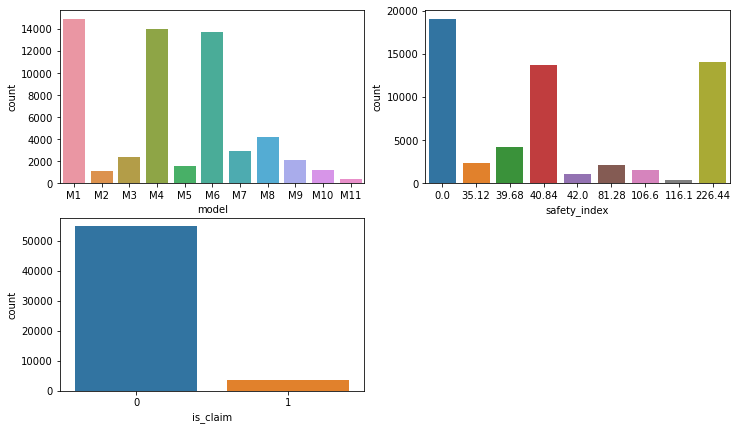

In [34]:
# CATEGORICAL COLUMNS 

plt.figure(figsize=(12,7))
plt.subplot(221)
sns.countplot(df['model'])

plt.subplot(222)
sns.countplot(df['safety_index'])

plt.subplot(223)
sns.countplot(df['is_claim'])

In [35]:
df['is_claim'] = df['is_claim'].astype('object')
df['safety_index'] = df['safety_index'].astype('object')

#### 2. BIVARIATE ANALYSIS

#### Numerical vs Categorical(target variable)

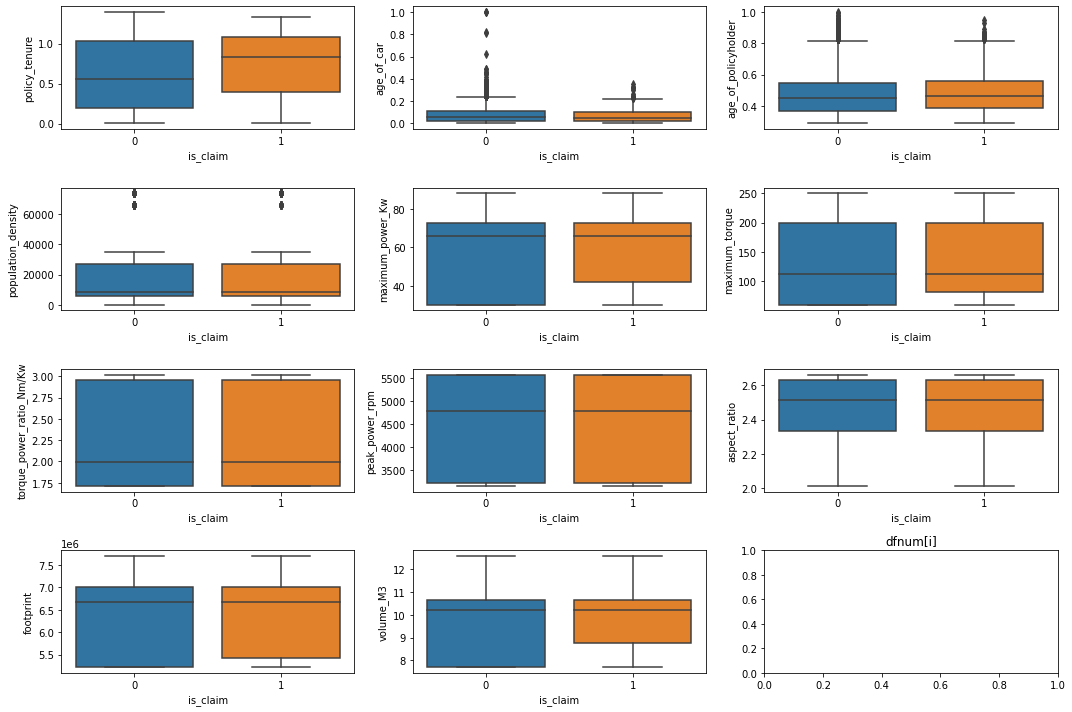

In [36]:
# through boxplots. 

dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(4,3,figsize=(15,10))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(df['is_claim'], dfnum[i], ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

<AxesSubplot:xlabel='age_of_car', ylabel='Probability'>

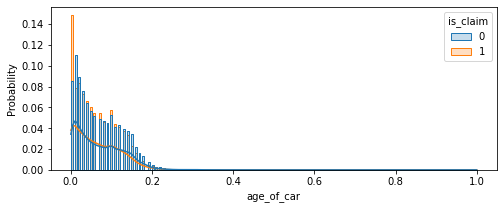

In [37]:
# Numerical v/s Categorical(target variable)
# Through distribution plots(only for numerical columns that are continous)

plt.figure(figsize=(8,3))
sns.histplot(
    df, x="age_of_car", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True, )

# Customers who have claimed and who have not claimed an insurance within 6 months (target variable) both have the
# same distribution of car's ages.

<AxesSubplot:xlabel='policy_tenure', ylabel='Probability'>

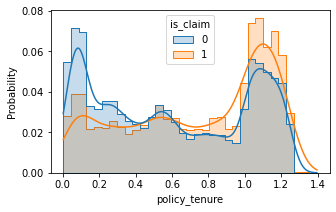

In [38]:
plt.figure(figsize=(5,3))
sns.histplot(
    df, x="policy_tenure", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True, )

# Customers who have claimed and who have not claimed an insurance within 6 months (target variable) have a little
# different distribution of policy_tenure.

<AxesSubplot:xlabel='age_of_policyholder', ylabel='Probability'>

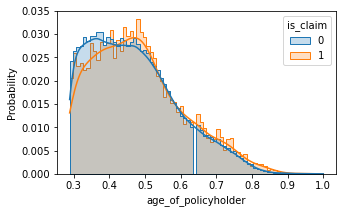

In [39]:
plt.figure(figsize=(5,3))
sns.histplot(
    df, x="age_of_policyholder", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True,)

# Customers who have claimed and who have not claimed an insurance within 6 months (target variable) both have almost
# similar distribution of policyholder's age.

#### Categorical v/s Categorical(target variable)

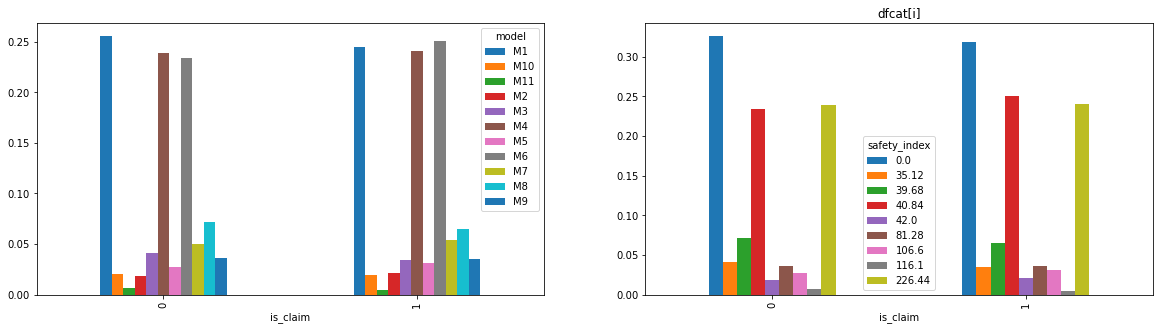

In [40]:
dfcat=df.select_dtypes(include='object').drop('is_claim', axis=1)
fig,ax = plt.subplots(1,2,figsize=(20,5))

for i,subplot in zip(dfcat,ax.flatten()):
    
    pd.crosstab(df['is_claim'], dfcat[i], normalize= 'index').plot(kind='bar', ax= subplot)
    plt.title('dfcat[i]')


<AxesSubplot:xlabel='safety_index', ylabel='footprint'>

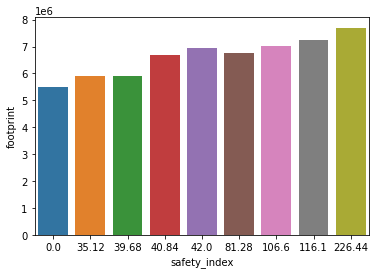

In [41]:
sns.barplot( df['safety_index'], df['footprint'])

# possible inference: as safety index of customer's car increases, the average footprint value increase(higher footprint 
# means higher stability of car)

### Outlier Checking

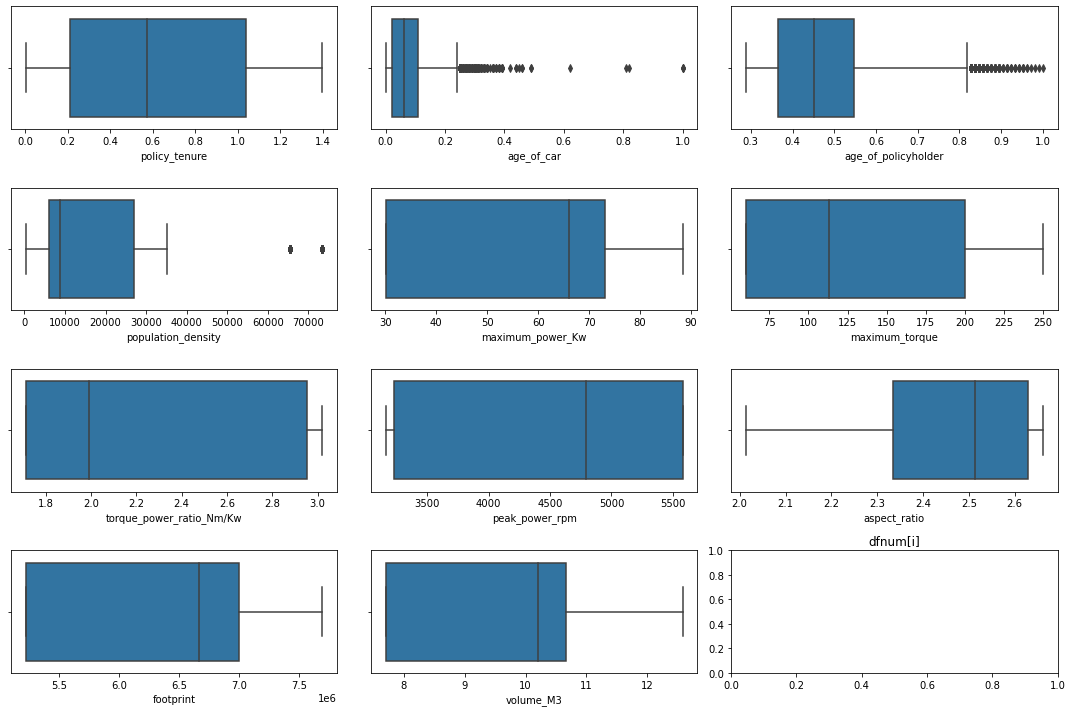

In [42]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(4,3,figsize=(15,10))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

#### Applying Transformation on columns that have huge skewness

In [43]:
from sklearn.preprocessing import PowerTransformer

p=PowerTransformer(method='yeo-johnson')
df['age_of_car']=p.fit_transform(df[['age_of_car']])

p=PowerTransformer(method='box-cox')
df['age_of_policyholder']=p.fit_transform(df[['age_of_policyholder']])

### Checking Class Imbalance in Target Variable

Text(0.5, 0, 'Target variable : is_claim')

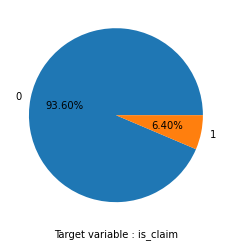

In [44]:
plt.pie(df['is_claim'].value_counts(), radius=1, autopct='%.2f%%', labels= df['is_claim'].unique())
plt.xlabel('Target variable : is_claim')

# There's huge imbalance

In [45]:
gb['is_claim'].value_counts()/len(gb)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In [46]:
gb['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [47]:
df['is_claim']=df['is_claim'].astype('int64')

### MODEL BUILDING

In [48]:
# Since the target variable is highly imbalanced, SMOTE is applied to bring balance in it 

df['is_claim']=df['is_claim'].astype('int64')
x=pd.concat([w.fit_transform(df.model,df.is_claim),df.drop(['is_claim','model'],axis=1)],axis=1)
y=df.is_claim
from imblearn.over_sampling import SMOTE
xr,yr=SMOTE(sampling_strategy=0.5).fit_resample(x,y)
df=pd.concat([xr,pd.DataFrame(yr)],axis=1)
df

# df is new dataframe with balanced target variable

,model,policy_tenure,age_of_car,age_of_policyholder,population_density,maximum_power_Kw,maximum_torque,torque_power_ratio_Nm/Kw,peak_power_rpm,aspect_ratio,footprint,volume_M3,safety_index,is_claim
0,-0.042965,0.515874,-0.200500,1.338223,4990,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.0,0
1,-0.042965,0.672619,-0.923772,-0.732891,27003,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.0,0
2,-0.042965,0.841110,-0.923772,-0.628658,4076,30.10856,60.0,1.992789,4791.777324,2.335593,5219175,7.70,0.0,0
3,0.168468,0.900277,0.862825,-0.153571,21622,66.02100,113.0,1.711577,5579.066628,2.636964,6931325,10.50,42.0,0
4,-0.174320,0.596403,0.862825,1.284902,34738,50.02676,91.0,1.819026,5249.511332,2.504027,5891249,8.78,35.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82261,-0.399710,0.986287,1.065219,0.874567,34738,88.29656,170.0,1.925330,4959.669714,2.486301,7231323,11.61,116.1,1
82262,0.005647,1.121063,1.557442,0.162186,4076,84.63370,250.0,2.953906,3232.668805,2.629969,7697000,12.58,226.44,1
82263,0.068488,1.093042,-0.274349,0.080350,6108,66.02100,113.0,1.711577,5579.066628,2.513072,6671075,10.21,40.84,1
82264,0.068488,0.556849,0.824830,0.092592,6112,66.02100,113.0,1.711577,5579.066628,2.513072,6671075,10.21,40.84,1


In [49]:
df.safety_index=df.safety_index.astype('float64')
xr.safety_index=xr.safety_index.astype('float64')
x.safety_index=x.safety_index.astype('float64')

Text(0.5, 0, 'Target variable : is_claim')

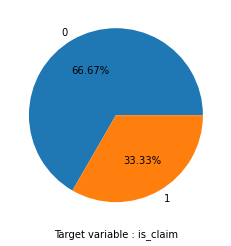

In [50]:
# target variable is now balanced
plt.pie(df['is_claim'].value_counts(), radius=1, autopct='%.2f%%', labels= df['is_claim'].unique())
plt.xlabel('Target variable : is_claim')

In [51]:
models_df = pd.DataFrame(columns=['Model_Name','AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

In [52]:
models_df2 = pd.DataFrame(columns=['Model_Name','AUC Score', 'Precision Score', 'Recall Score',
  'Accuracy Score', 'Kappa Score', 'f1-score'])

#### BASE MODEL

In [53]:
# Base model: logistic regression. (with all its default parameters)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

lr.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve, confusion_matrix
accuracy_score(ytest,lr.predict(xtest))

print('Training data report')
print(classification_report(ytrain,lr.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,lr.predict(xtest)))
print(confusion_matrix(ytest,lr.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     38391
           1       0.00      0.00      0.00     19195

    accuracy                           0.67     57586
   macro avg       0.33      0.50      0.40     57586
weighted avg       0.44      0.67      0.53     57586


Test data report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     16453
           1       0.00      0.00      0.00      8227

    accuracy                           0.67     24680
   macro avg       0.33      0.50      0.40     24680
weighted avg       0.44      0.67      0.53     24680

[[16453     0]
 [ 8227     0]]


In [54]:
from sklearn import metrics
ypred=lr.predict(xtest)
models_df = models_df.append({'Model_Name':'Logistic_regression','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0


In [55]:
ypred=lr.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'Logistic_regression','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

<AxesSubplot:ylabel='Density'>

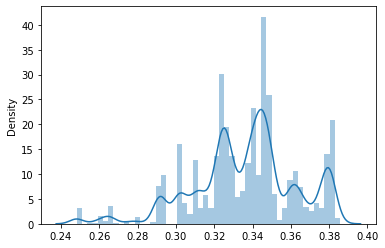

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)
sns.distplot(lr.predict_proba(xtest)[:,1])
# distribution of probabilities for class1

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)
fpr,tpr,threshold =roc_curve(ytest,lr.predict_proba(xtest)[:,1]) # calculating fpr, tpr, thresh

In [58]:

import sklearn.metrics as metrics
cutoff_per = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])
for cutoff in [i for i in np.arange(lr.predict_proba(xtest)[:,1].min(),lr.predict_proba(xtest)[:,1].max() ,0.01)]:


#   ypred_prob = logreg.predict(xtest_c)
  ypred = [ 0 if x < cutoff else 1 for x in lr.predict_proba(xtest)[:,1]]

  global cutoff_per

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
cutoff_per.sort_values(by='f1-score', ascending=False)

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
4,0.288113,0.510303,0.338074,0.982497,0.352917,0.013955,0.50305
2,0.268113,0.508874,0.337391,0.987116,0.349473,0.011981,0.502895
3,0.278113,0.509117,0.33751,0.985535,0.350324,0.012321,0.502822
5,0.298113,0.516898,0.341506,0.942993,0.374878,0.023465,0.501422
1,0.258113,0.503586,0.334956,0.995503,0.339627,0.004804,0.501255
0,0.248113,0.5,0.333347,1.0,0.333347,0.0,0.500015
6,0.308113,0.51143,0.33924,0.877233,0.389506,0.01637,0.489272
7,0.318113,0.513468,0.340829,0.818038,0.411953,0.019953,0.481178
8,0.328113,0.502473,0.335127,0.620639,0.463088,0.004078,0.435238
9,0.338113,0.510346,0.341991,0.545764,0.498541,0.01801,0.420491


In [59]:
# Using Youden's index to find most suitable value of threshold

fpr,tpr,threshold =roc_curve(ytest,lr.predict_proba(xtest)[:,1])
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})


# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.938009,0.899775,0.300842,0.038234
1,0.938252,0.900383,0.300842,0.037869
2,0.930716,0.892907,0.301745,0.037809
3,0.930594,0.892846,0.301745,0.037748
4,0.936186,0.898438,0.300842,0.037748


In [60]:
# Checking model performance with new threshold value:

print(classification_report(ytest,[ 0 if x < youdens_table['Threshold'][0] else 1 for x in lr.predict_proba(xtest)[:,1]]))
print(confusion_matrix(ytest,[ 0 if x < youdens_table['Threshold'][0] else 1 for x in lr.predict_proba(xtest)[:,1]]))

              precision    recall  f1-score   support

           0       0.76      0.10      0.18     16453
           1       0.34      0.94      0.50      8227

    accuracy                           0.38     24680
   macro avg       0.55      0.52      0.34     24680
weighted avg       0.62      0.38      0.29     24680

[[ 1649 14804]
 [  510  7717]]


In [61]:
from sklearn import metrics
ypred= [ 0 if x < youdens_table['Threshold'][0] else 1 for x in lr.predict_proba(xtest)[:,1] ]
models_df = models_df.append({'Model_Name':'Logistic_regression with youden_index(threshold)',
                              'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951


In [62]:
ypred=[ 0 if x < youdens_table['Threshold'][0] else 1 for x in lr.predict_proba(x)[:,1] ]
ytest=y
models_df2 = models_df2.append({'Model_Name':'Logistic_regression with youden_index(threshold)','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [63]:
# Second Base Model: Decision Tree (with default parameters)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt1=DecisionTreeClassifier()
dt1.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,dt1.predict(xtest))

print('Training data report')
print(classification_report(ytrain,dt1.predict(xtrain)))
print(confusion_matrix(ytrain,dt1.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,dt1.predict(xtest)))
print(confusion_matrix(ytest,dt1.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38391
           1       1.00      1.00      1.00     19195

    accuracy                           1.00     57586
   macro avg       1.00      1.00      1.00     57586
weighted avg       1.00      1.00      1.00     57586

[[38391     0]
 [    0 19195]]

Test data report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     16453
           1       0.79      0.81      0.80      8227

    accuracy                           0.87     24680
   macro avg       0.85      0.85      0.85     24680
weighted avg       0.87      0.87      0.87     24680

[[14659  1794]
 [ 1537  6690]]


In [64]:
ypred=dt1.predict(xtest)
models_df = models_df.append({'Model_Name':'Decision Tree','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067


In [65]:
ypred=dt1.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'Decision Tree','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [66]:
# Decision Tree with Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

p={'criterion':['gini','entropy'],'min_samples_leaf':[i for i in range(1,10)],'max_depth':[i for i in range(7,10)]}

m=GridSearchCV(cv=5,estimator=DecisionTreeClassifier(),param_grid=p)

m.fit(xtrain,ytrain)

print(m.best_params_)
print(m.best_score_)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6}
0.7278504504458051
Training data report
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     38391
           1       0.87      0.23      0.37     19195

    accuracy                           0.73     57586
   macro avg       0.79      0.61      0.60     57586
weighted avg       0.77      0.73      0.68     57586

[[37705   686]
 [14717  4478]]

Test data report
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     16453
           1       0.87      0.24      0.37      8227

    accuracy                           0.73     24680
   macro avg       0.79      0.61      0.60     24680
weighted avg       0.77      0.73      0.68     24680

[[16147   306]
 [ 6261  1966]]


In [67]:
ypred=m.predict(xtest)
d= m.best_params_
models_df = models_df.append({'Model_Name':str('Decision Tree with '+','.join([str(i) + ':' + str(j) for i, j in zip(list(d.keys()), 
                                                                                                                     list(d.values()))])),
                              'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512


In [68]:
ypred=m.predict(x)
ytest=y
d= m.best_params_
models_df2 = models_df2.append({'Model_Name':str('Decision Tree with '+','.join([str(i) + ':' + str(j) for i, j in zip(list(d.keys()), 
                                                                                                                     list(d.values()))])),'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [69]:
# Getting important features

dfeat = pd.DataFrame()
dfeat['Variable'] = xtrain.columns
dfeat['Importance'] = dt1.feature_importances_
tempdf = dfeat.sort_values(by= 'Importance', ascending= False)
tempdf

,Variable,Importance
2,age_of_car,0.495089
1,policy_tenure,0.209197
3,age_of_policyholder,0.161262
4,population_density,0.067101
10,footprint,0.012005
6,maximum_torque,0.011173
9,aspect_ratio,0.009333
0,model,0.008827
12,safety_index,0.007339
7,torque_power_ratio_Nm/Kw,0.005977


<AxesSubplot:xlabel='Importance', ylabel='Variable'>

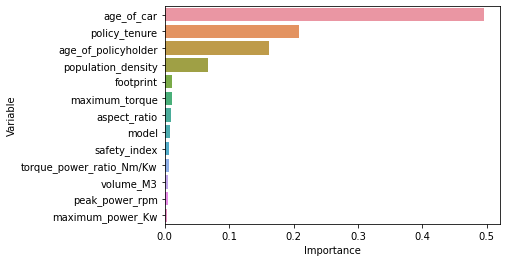

In [70]:
sns.barplot(tempdf['Importance'], tempdf['Variable'])

In [71]:
# Random Forest model

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split


m=RandomForestClassifier(oob_score=True)
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38391
           1       1.00      1.00      1.00     19195

    accuracy                           1.00     57586
   macro avg       1.00      1.00      1.00     57586
weighted avg       1.00      1.00      1.00     57586

[[38391     0]
 [    0 19195]]

Test data report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     16453
           1       0.87      0.75      0.80      8227

    accuracy                           0.88     24680
   macro avg       0.87      0.84      0.86     24680
weighted avg       0.88      0.88      0.87     24680

[[15494   959]
 [ 2078  6149]]


In [72]:
ypred=m.predict(xtest)
models_df = models_df.append({'Model_Name':'Random Forest','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512
4,Random Forest,0.844565,0.865082,0.747417,0.876945,0.713386,0.801956


In [73]:
ypred=m.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'Random Forest','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [74]:
## Random Forest with hyperparameter tuning

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split


m=RandomForestClassifier(n_estimators=10, oob_score=True, max_depth=7)

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     38391
           1       0.74      0.15      0.24     19195

    accuracy                           0.70     57586
   macro avg       0.72      0.56      0.53     57586
weighted avg       0.71      0.70      0.62     57586

[[37387  1004]
 [16391  2804]]

Test data report
              precision    recall  f1-score   support

           0       0.69      0.97      0.81     16453
           1       0.73      0.14      0.23      8227

    accuracy                           0.70     24680
   macro avg       0.71      0.56      0.52     24680
weighted avg       0.70      0.70      0.62     24680

[[16026   427]
 [ 7091  1136]]


In [75]:
ypred=m.predict(xtest)
models_df = models_df.append({'Model_Name':'Random Forest : tuning(10 trees, max_dept=10)','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [76]:
ypred=m.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'Random Forest : tuning(10 trees, max_dept=10)','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [77]:
# Ensembling model: AdaBoost

xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)
m=AdaBoostClassifier()

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.72      0.94      0.82     38391
           1       0.70      0.26      0.38     19195

    accuracy                           0.72     57586
   macro avg       0.71      0.60      0.60     57586
weighted avg       0.71      0.72      0.67     57586

[[36257  2134]
 [14245  4950]]

Test data report
              precision    recall  f1-score   support

           0       0.71      0.94      0.81     16453
           1       0.68      0.25      0.36      8227

    accuracy                           0.71     24680
   macro avg       0.70      0.60      0.59     24680
weighted avg       0.70      0.71      0.66     24680

[[15506   947]
 [ 6190  2037]]


In [78]:
ypred=m.predict(xtest)
models_df = models_df.append({'Model_Name':'ada boost','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512
4,Random Forest,0.844565,0.865082,0.747417,0.876945,0.713386,0.801956
5,"Random Forest : tuning(10 trees, max_dept=10)",0.556065,0.726807,0.138082,0.695381,0.140599,0.232074
6,ada boost,0.595021,0.682641,0.247599,0.710818,0.226055,0.363393


In [79]:
ypred=m.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'ada boost','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [80]:
# Ensembling model: GradientBoosting

m=GradientBoostingClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     38391
           1       0.96      0.59      0.73     19195

    accuracy                           0.85     57586
   macro avg       0.90      0.79      0.81     57586
weighted avg       0.87      0.85      0.84     57586

[[37981   410]
 [ 7956 11239]]

Test data report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     16453
           1       0.97      0.58      0.73      8227

    accuracy                           0.85     24680
   macro avg       0.90      0.79      0.81     24680
weighted avg       0.87      0.85      0.84     24680

[[16279   174]
 [ 3422  4805]]


In [81]:
ypred=m.predict(xtest)
models_df = models_df.append({'Model_Name':'Gradient Boosting','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512
4,Random Forest,0.844565,0.865082,0.747417,0.876945,0.713386,0.801956
5,"Random Forest : tuning(10 trees, max_dept=10)",0.556065,0.726807,0.138082,0.695381,0.140599,0.232074
6,ada boost,0.595021,0.682641,0.247599,0.710818,0.226055,0.363393
7,Gradient Boosting,0.786738,0.965053,0.584053,0.854295,0.636273,0.7277


In [82]:
ypred=m.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'Gradient Boosting','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [83]:
# Ensembling model: XGBoost
from xgboost import XGBClassifier
m=XGBClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     38391
           1       1.00      0.84      0.91     19195

    accuracy                           0.95     57586
   macro avg       0.96      0.92      0.94     57586
weighted avg       0.95      0.95      0.94     57586

[[38344    47]
 [ 3072 16123]]

Test data report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16453
           1       0.99      0.83      0.91      8227

    accuracy                           0.94     24680
   macro avg       0.96      0.92      0.93     24680
weighted avg       0.95      0.94      0.94     24680

[[16411    42]
 [ 1359  6868]]


In [84]:
ypred=m.predict(xtest)
models_df = models_df.append({'Model_Name':'XGBClassifier','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512
4,Random Forest,0.844565,0.865082,0.747417,0.876945,0.713386,0.801956
5,"Random Forest : tuning(10 trees, max_dept=10)",0.556065,0.726807,0.138082,0.695381,0.140599,0.232074
6,ada boost,0.595021,0.682641,0.247599,0.710818,0.226055,0.363393
7,Gradient Boosting,0.786738,0.965053,0.584053,0.854295,0.636273,0.7277
8,XGBClassifier,0.91613,0.993922,0.834812,0.943233,0.866953,0.907445


In [85]:
ypred=m.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'XGBClassifier','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [86]:
from sklearn.ensemble import StackingClassifier
s=StackingClassifier([('rf',RandomForestClassifier(n_estimators=5)),('gbc',GradientBoostingClassifier(n_estimators=15))])
s.fit(xtrain,ytrain)

print('Training data report')
print(classification_report(ytrain,s.predict(xtrain)))
print(confusion_matrix(ytrain,s.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,s.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     38391
           1       0.98      0.95      0.97     19195

    accuracy                           0.98     57586
   macro avg       0.98      0.97      0.98     57586
weighted avg       0.98      0.98      0.98     57586

[[38088   303]
 [  896 18299]]

Test data report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     16453
           1       0.78      0.70      0.74      8227

    accuracy                           0.83     24680
   macro avg       0.82      0.80      0.81     24680
weighted avg       0.83      0.83      0.83     24680



In [87]:
ypred=s.predict(xtest)
models_df = models_df.append({'Model_Name':'Stacking Classifier','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512
4,Random Forest,0.844565,0.865082,0.747417,0.876945,0.713386,0.801956
5,"Random Forest : tuning(10 trees, max_dept=10)",0.556065,0.726807,0.138082,0.695381,0.140599,0.232074
6,ada boost,0.595021,0.682641,0.247599,0.710818,0.226055,0.363393
7,Gradient Boosting,0.786738,0.965053,0.584053,0.854295,0.636273,0.7277
8,XGBClassifier,0.91613,0.993922,0.834812,0.943233,0.866953,0.907445
9,Stacking Classifier,0.800836,0.782496,0.698797,0.834846,0.618202,0.738282


In [88]:
ypred=s.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'Stacking Classifier','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [89]:
from sklearn.ensemble import VotingClassifier
v=VotingClassifier(([('rf',RandomForestClassifier()),('xgb',XGBClassifier()),('gbc',GradientBoostingClassifier())]))
v.fit(xtrain,ytrain)

print('Training data report')
print(classification_report(ytrain,v.predict(xtrain)))
print(confusion_matrix(ytrain,v.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,v.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     38391
           1       1.00      0.85      0.92     19195

    accuracy                           0.95     57586
   macro avg       0.96      0.92      0.94     57586
weighted avg       0.95      0.95      0.95     57586

[[38380    11]
 [ 2953 16242]]

Test data report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     16453
           1       0.99      0.77      0.86      8227

    accuracy                           0.92     24680
   macro avg       0.94      0.88      0.90     24680
weighted avg       0.93      0.92      0.92     24680



In [90]:
ypred=v.predict(xtest)
models_df = models_df.append({'Model_Name':'Voting Classifier','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.666653,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512
4,Random Forest,0.844565,0.865082,0.747417,0.876945,0.713386,0.801956
5,"Random Forest : tuning(10 trees, max_dept=10)",0.556065,0.726807,0.138082,0.695381,0.140599,0.232074
6,ada boost,0.595021,0.682641,0.247599,0.710818,0.226055,0.363393
7,Gradient Boosting,0.786738,0.965053,0.584053,0.854295,0.636273,0.7277
8,XGBClassifier,0.91613,0.993922,0.834812,0.943233,0.866953,0.907445
9,Stacking Classifier,0.800836,0.782496,0.698797,0.834846,0.618202,0.738282


In [91]:
ypred=v.predict(x)
ytest=y
models_df2 = models_df2.append({'Model_Name':'Voting Classifier','AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)
models_df2
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

In [92]:
models_df.sort_values(by='f1-score', ascending=False)

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
8,XGBClassifier,0.91613,0.993922,0.834812,0.943233,0.866953,0.907445
10,Voting Classifier,0.881822,0.985519,0.769296,0.919327,0.807957,0.864086
4,Random Forest,0.844565,0.865082,0.747417,0.876945,0.713386,0.801956
2,Decision Tree,0.852069,0.788543,0.813176,0.865032,0.698682,0.80067
9,Stacking Classifier,0.800836,0.782496,0.698797,0.834846,0.618202,0.738282
7,Gradient Boosting,0.786738,0.965053,0.584053,0.854295,0.636273,0.7277
1,Logistic_regression with youden_index(threshold),0.519117,0.342658,0.938009,0.379498,0.026656,0.501951
3,"Decision Tree with criterion:entropy,max_depth...",0.610185,0.865317,0.238969,0.733914,0.269056,0.374512
6,ada boost,0.595021,0.682641,0.247599,0.710818,0.226055,0.363393
5,"Random Forest : tuning(10 trees, max_dept=10)",0.556065,0.726807,0.138082,0.695381,0.140599,0.232074


In [93]:
#Metric table of original data with out upsampling
models_df2

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic_regression,0.5,0.0,0.0,0.936032,0.0,0.0
1,Logistic_regression with youden_index(threshold),0.512873,0.065672,0.928762,0.150191,0.003615,0.12267
2,Decision Tree,0.877321,0.621918,0.787353,0.955779,0.671441,0.694925
3,"Decision Tree with criterion:entropy,max_depth...",0.518971,0.174709,0.05603,0.922686,0.055506,0.084848
4,Random Forest,0.897474,0.76049,0.812433,0.971634,0.770434,0.785604
5,"Random Forest : tuning(10 trees, max_dept=10)",0.525641,0.168507,0.077375,0.916559,0.068553,0.106052
6,ada boost,0.521004,0.106698,0.098186,0.889729,0.04363,0.102265
7,Gradient Boosting,0.508416,0.149927,0.027481,0.927823,0.027169,0.046449
8,XGBClassifier,0.511462,0.508287,0.024546,0.936083,0.04118,0.046831
9,Stacking Classifier,0.844996,0.588261,0.724653,0.949942,0.622732,0.649372
